# Text Mining

In [34]:
#открываем файлы, загрузка библиотек
import glob, os
import pandas as pd
rotonda=[]
for filepath in glob.iglob(r'C:\Users\Maria\Desktop\Media\Rotonda/*.txt'):
    file= open(filepath,'r' , encoding='utf-8')
    file_opened = file.read()
    rotonda.append(file_opened)

In [35]:
df=pd.DataFrame(rotonda)
df=df.rename(columns={0: 'posts'})

Лемматизация

In [ ]:
import pymystem3
import re
import time

m = pymystem3.Mystem()
# create a list where our lematized texts will be stored
y_data = []

start = time.time()
num_rows, num_feature = df.shape

# how we arrange cycle for lematization of all documents
for i in range(num_rows):
    # getting doc
    text = str(df['posts'][i])
    # remove quotes from text 
    s = text.replace('"', '')
    s = text.replace('=', '')
    s = text.replace('|', '')
    s1 = re.sub('[qwertyuiopasdfghjklzxcvbnm\/!@#$1234567890#—ツ►๑۩۞۩•*”˜˜”*°°*`]', '', s)
    # how we are doing lematization
    s1 = m.lemmatize(s1)
    s1 = ''.join(s1)
    lemans=str(s1)

    y_data.append(lemans)
    print('обработка документа №: ', i)

stop = time.time()    
# results is set lematized documents
print('time of execution (sec)', stop - start)

In [ ]:
#Лемматизированные данные
y_data

In [39]:
#получение вектора из токенов
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts
vec = CountVectorizer()

In [40]:
#Векторизация данных
x = vec.fit_transform(y_data)
data = vec.fit_transform(y_data).toarray()

num_docs, num_feature =x.shape
print('document number: ', num_docs, 'features number: ', num_feature)

document number:  85 features number:  1923


In [ ]:
myfich=vec.get_feature_names()

print('Feature #2:', myfich[1])
# attention feature numbering starts from zero
print('The full list of features')
print(myfich)

myfich

In [ ]:
del myfich[:100]
myfich

In [60]:
freq_data = data.sum(axis=0)
print(freq_data)

[1 1 1 ... 3 4 1]


In [61]:
#Сохраняем получившиеся слова, их частоту и длину в файл
f = open('C:/Users/Maria/Desktop/freq.csv', 'w')
for i, line in enumerate(myfich):
     ss = myfich[i] + ';' + str(freq_data[i]) + ';' + str(len(myfich[i])) 
     f.write(ss + '\n')

f.close()

In [62]:
file_name='C:/Users/Maria/Desktop/text minin/my_stop.txt'
words = pd.read_csv(file_name)
my_stop = words['Stop_words'].values.tolist()

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,1),stop_words=(my_stop))


In [63]:
# получаем матрицу частот слов в документах.
import numpy as np
x = vec.fit_transform(y_data)

data = vec.fit_transform(y_data).toarray()

num_docs, num_feature =x.shape
print('doc number: ', num_docs, 'feature number: ', num_feature)

# чтобы узнать количественное вхождение каждого слова:
matrix_freq = np.asarray(data.sum(axis=0)).ravel()
final_matrix = np.array([np.array(vec.get_feature_names()), matrix_freq])


# сохраняем слово и его tf-idf
f = open('C:/Users/Maria/Desktop/freq.csv', 'w' )
for i in range(num_feature):
    s = final_matrix[0][i]+ ';' + final_matrix[1][i]  + ';' + str(freq_data[i]) 
    f.write("%s\n" % s)
    
f.close()

doc number:  85 feature number:  1877


In [64]:
print('число слов после удаления стоп слов: ', matrix_freq.shape)
print(matrix_freq)

число слов после удаления стоп слов:  (1877,)
[0.17462384 0.14613894 0.14042597 ... 0.37401247 0.49555866 0.14042597]


In [82]:
rotonda_freq= pd.read_csv('C:/Users/Maria/Desktop/freq.csv', encoding= "ANSI", sep=';')
rotonda_freq= rotonda_freq.rename(columns={ '_cwsjwjhi' : 'names' , '0.17462383692244404' : 'tf_idf', '1' : 'freq'})
rotonda_freq= rotonda_freq[133:]
rotonda_freq.head()

,names,tf_idf,freq
133,аптека,0.168810,1
134,аргумент,0.129801,1
135,артиллерийский,0.098419,1
136,архитектура,0.115538,1
137,атрибут,0.236237,1


In [83]:
rotonda_freq.describe()

,tf_idf,freq
count,1743.000000,1743.000000
mean,0.299769,3.195640
std,0.341477,7.318578
min,0.085375,1.000000
25%,0.133403,1.000000
50%,0.182310,1.000000
75%,0.323471,3.000000
max,4.576876,131.000000


In [68]:
rotonda_top= rotonda_freq[rotonda_freq.freq>3.2]

In [79]:
rotonda_top.sort_values(by=['tf_idf'], ascending=False).head(50)

,names,tf_idf,freq
150,бегол,2.410587,29
356,город,2.380027,21
1609,ссылка,1.824402,10
352,год,1.502378,6
249,владимир,1.502076,4
1196,поправка,1.482109,7
1369,работа,1.361793,5
1480,сегодня,1.186272,31
460,единый,1.175163,14
149,беглов,1.064365,12


In [86]:
rotonda_bag= rotonda_top.drop(columns=['freq'])
rotonda_bag

,names,tf_idf
145,бар,0.504980
149,беглов,1.064365
150,бегол,2.410587
151,белковский,0.134649
161,блиц,0.144053
...,...,...
1858,элла,0.540293
1859,эмоциональный,0.138901
1862,эргашев,0.297985
1864,эфир,0.116891


In [ ]:
%pip install WordCloud

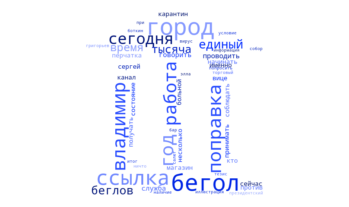

In [113]:
from PIL import Image
mask_rot=np.array(Image.open('C:/Users/Maria/Desktop/rotonda.png'))
from wordcloud import WordCloud
d = {}
for a, x in rotonda_bag.values:
    d[a] = x
    
    
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(230,100%%, %d%%)" % random.randint(20, 80)  #https://www.w3schools.com/colors/colors_hsl.asp

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=50,width=640, height=640, mask= mask_rot)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()

Topic Modeling

In [70]:
tf_vectorizer = vec
tf = x

In [74]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=20,
                                learning_method='online', random_state=2018)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=20,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=2018,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [75]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [76]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words=5)

Topic #0: храм фотография петербург продукт губернатор
Topic #1: час уголовный ответственность быть работа
Topic #2: маска ротонда петербургский комиссия петербуржец
Topic #3: почетный гражданин выборы год звание
Topic #4: покровский больница спбга факультет деньги
Topic #5: проведение человек тик политика свыше
Topic #6: путин поправка объяснять собор мигрант
Topic #7: быть петербург губернатор александр бегол
Topic #8: канал тысяча пневмония депутат работать
Topic #9: день коронавирус быть заболевать фотография



In [77]:
tf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['rt', 'ад', 'ан', 'аш', 'бы', 'во', 'вы', 'до',
                            'др', 'ее', 'ес', 'же', 'за', 'из', 'ик', 'их',
                            'км', 'ли', 'мм', 'мы', 'на', 'не', 'ни', 'но',
                            'об', 'он', 'ос', 'от', 'по', 'рф', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

# Часть 2

In [ ]:
%pip install gensim
%pip install pandas
%pip install nltk
%pip install pyLDAvis

^C
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from nltk.corpus import stopwords
import re, string
from nltk.stem.snowball import SnowballStemmer

russian_stopwords = stopwords.words("russian")# собираем стоп слова
regex = re.compile('[%s]' % re.escape(string.punctuation)) # компилим regexp выражение
stemmer = SnowballStemmer("russian") # инициализируем стэмминг

def preprocessing(text):
    text = regex.sub('', text) # удаляем пунктуацию
    text = [token for token in text.split() if token not in russian_stopwords] # Удаляем стоп слова
    text = [stemmer.stem(token) for token in text] # Выполняем стэмминг
    text = [token for token in text if token] # Удаляем пустые токены
    return ' '.join(text)

In [5]:
import glob, os
import pandas as pd
df=[]
for filepath in glob.iglob(r'C:\Users\Maria\Desktop\Media\Rotonda/*.txt'):
    file= open(filepath,'r' , encoding='utf-8')
    file_opened = file.read()
    df.append(file_opened)


df= pd.DataFrame(df)
df=df.rename(columns={0: 'text'})
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [6]:
text_clean= []
for index, row in df.iterrows():
        text_clean.append(row['text'].split())

from gensim.models import Phrases
bigram = Phrases(text_clean) # Создаем биграммы на основе корпуса
trigram = Phrases(bigram[text_clean])# Создаем триграммы на основе корпуса

for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:
            # Токен это би грамма, добавим в документ.
            text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
            # Токен это три грамма, добавим в документ.
            text_clean[idx].append(token)

In [7]:
from gensim.corpora.dictionary import Dictionary
from numpy import array
dictionary = Dictionary(text_clean)
#Создадим словарь и корпус для lda модели
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 2385
Количество документов: 85


In [ ]:
from gensim.models.ldamulticore import LdaMulticore
model=LdaMulticore(corpus=myfich,id2word=dictionary, num_topics=2)
model.show_topics()

In [9]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)

C:\Users\Maria\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [10]:
data

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.011964  0.0       1        1  59.014996
1     -0.011964  0.0       2        1  40.985008, topic_info=                     Term       Freq      Total Category  logprob  loglift
233        александр_бегл  47.000000  47.000000  Default  30.0000  30.0000
98              александр  34.000000  34.000000  Default  29.0000  29.0000
54                      —  77.000000  77.000000  Default  28.0000  28.0000
112  губернатор_петербург  30.000000  30.000000  Default  27.0000  27.0000
238          глав_комитет  12.000000  12.000000  Default  26.0000  26.0000
..                    ...        ...        ...      ...      ...      ...
503      вячеслав_макаров   7.125812  16.467579   Topic2  -5.8701   0.0543
48               фотограф  17.438667  67.134430   Topic2  -4.9752  -0.4560
8                       в   9.439383  27.172781   Topic2  -5.5890  -0.1654
53                     эт   8.430632  25.865179   Topic2  -5.7020  -0.2291
33                подробн   8.083850  23.527122   Topic2  -5.7440  -0.1763

[180 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.747961     1
1         2  0.186990     1
1989      2  0.748073  1307
88        1  0.326604    15
88        2  0.653208    15
...     ...       ...   ...
54        1  0.553291     —
54        2  0.450353     —
55        1  0.642162     ⠀
55        2  0.361946     ⠀
2006      2  0.747768  🔔для

[214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [12]:
from gensim.models.coherencemodel import CoherenceModel 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	
# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_clean, start=2, limit=40, step=2)

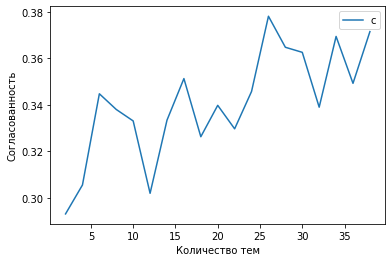

In [24]:
import matplotlib.pyplot as plt
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
model_list[16].save('C:/Users/Maria/Desktop/model/best_model.lda')
# Сохраняем словарь
from gensim import corpora
corpora.Dictionary.save(dictionary, "C:/Users/Maria/Desktop/model/dictionary.dict")
# Сохраняем корпус
corpora.BleiCorpus.save_corpus(fname="C:/Users/Maria/Desktop/model/corpus.lda-c",corpus= corpus)
# Сохраняем выражения 
bigram.save('C:/Users/Maria/Desktop/model/bigram.phs')
trigram.save('C:/Users/Maria/Desktop/model/trigram.phs')

In [26]:
class LdaPredictor():
    
    def __init__(self, lda_path, dict_path, bigram_path, trigram_path):
        """
        lda_path - путь к lda модели
        dict_path - путь к словарю 
        bigram_path - путь к биграммам
        trigram_path - путь к триграммам
        
        param: lda_path str
        param: dict_path str
        param: bigram_path str
        param: trigram_path str
        """
        self.dictionary = corpora.Dictionary.load(dict_path)
        self.lda = LdaMulticore.load(lda_path)
        self.bigram_path = bigram_path
        self.trigram_path = trigram_path
        
    def clean(self, text):
        text = regex.sub('', text) 
        text = [token for token in text.split() if token not in russian_stopwords]
        text = [stemmer.stem(token) for token in text]
        text = [token for token in text if token]
        return ' '.join(text)
    
    def bigram(self, text):
        bigram = Phrases.load(self.bigram_path)
        trigram = Phrases.load(self.trigram_path)
        text_clean = text
        for idx in range(len(text_clean)):
            for token in bigram[text_clean[idx]]:
                if '_' in token:
                    text_clean[idx].append(token)
            for token in trigram[text_clean[idx]]:
                if '_' in token:
                    text_clean[idx].append(token)
        return text_clean
    
    def predict(self, text):
        clean_text = self.clean(text).split()
        bigram = self.bigram([clean_text])
        new_review_bow = self.dictionary.doc2bow(bigram[0])
        new_review_lda = self.lda[new_review_bow]
        return sorted(new_review_lda, reverse=True, key=operator.itemgetter(1))

In [32]:
import operator
lda_path = "C:/Users/Maria/Desktop/model/best_model.lda"
dict_path = "C:/Users/Maria/Desktop/model/dictionary.dict"
bigram_path = "C:/Users/Maria/Desktop/model/bigram.phs"
trigram_path = "C:/Users/Maria/Desktop/model/trigram.phs"
lda = LdaPredictor(lda_path, dict_path,  bigram_path, trigram_path)
text = "Текст с первой кларификацией"
predict = lda.predict(text)
print(predict)
# Предсказанные классы
# [(16, 0.5016654), 
# (31, 0.5016663)]

[(31, 0.34318992), (10, 0.3429863)]
